In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_excel('data.xlsx')
display(df.head())

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.142170   0.270658   0.172161   0.128419   0.162705   0.011624   
1   0.128376   0.248993   0.260346   0.045832   0.206410   0.046443   
2   0.237904   0.350561   0.147295   0.065817   0.153813   0.233031   
3   0.177536   0.213367   0.180853   0.128782   0.198366   0.000082   
4   0.122600   0.170360   0.142664   0.013108   0.158516   0.000460   

   feature_6  feature_7  feature_8  feature_9  ...  feature_2039  \
0   0.282096   0.167847   0.012499   0.129094  ...      0.034066   
1   0.303825   0.147024   0.009290   0.239436  ...      0.005309   
2   0.158886   0.029988   0.014327   0.222089  ...      0.000000   
3   0.240751   0.033086   0.009554   0.177033  ...      0.001733   
4   0.200634   0.000000   0.000000   0.100740  ...      0.008589   

   feature_2040  feature_2041  feature_2042  feature_2043  feature_2044  \
0      0.024912      0.030153      0.323926      0.066432      0.026572   
1      0.114345      0.090300      0.247387      0.074784      0.017010   
2      0.007023      0.097333      0.153080      0.043310      0.022119   
3      0.086853      0.038954      0.141771      0.044282      0.047918   
4      0.114697      0.065512      0.139558      0.072949      0.002684   

   feature_2045  feature_2046  feature_2047  label  
0      0.165336      0.000000      0.174000      1  
1      0.118286      0.001307      0.218108      0  
2      0.134147      0.004047      0.105774      1  
3      0.172786      0.000000      0.093998      2  
4      0.104563      0.115294      0.107360      0  

[5 rows x 2049 columns]

In [3]:
print(df.shape)

(2060, 2049)


In [4]:
print(df['label'].value_counts())

1    920
0    783
2    357
Name: label, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Columns: 2049 entries, feature_0 to label
dtypes: float64(2048), int64(1)
memory usage: 32.2 MB


In [6]:
df.describe()

feature_0    feature_1    feature_2    feature_3    feature_4  \
count  2060.000000  2060.000000  2060.000000  2060.000000  2060.000000   
mean      0.160921     0.270409     0.208184     0.204598     0.241283   
std       0.060174     0.081587     0.123492     0.332334     0.119511   
min       0.064219     0.112422     0.119411     0.000000     0.131731   
25%       0.119265     0.223384     0.151960     0.062676     0.165306   
50%       0.153173     0.263307     0.164523     0.104471     0.199482   
75%       0.193926     0.313065     0.191397     0.161176     0.258664   
max       0.411141     0.673628     1.298625     1.287342     1.279045   

         feature_5    feature_6    feature_7    feature_8    feature_9  ...  \
count  2060.000000  2060.000000  2060.000000  2060.000000  2060.000000  ...   
mean      0.234374     0.246521     0.267722     0.226706     0.208153  ...   
std       0.608519     0.061969     0.701613     0.708157     0.090262  ...   
min       0.000000     0.144053     0.000000     0.000000     0.042953  ...   
25%       0.013066     0.199476     0.026164     0.004395     0.147668  ...   
50%       0.036835     0.234758     0.049078     0.010298     0.194815  ...   
75%       0.086375     0.289554     0.088395     0.020641     0.252502  ...   
max       2.285157     0.666712     2.662355     2.571561     0.875835  ...   

       feature_2039  feature_2040  feature_2041  feature_2042  feature_2043  \
count   2060.000000   2060.000000   2060.000000   2060.000000   2060.000000   
mean       0.240621      0.156424      0.175024      0.193772      0.077869   
std        0.720848      0.397291      0.418713      0.054952      0.070703   
min        0.000000      0.000000      0.000000      0.106502      0.037367   
25%        0.008080      0.016775      0.023489      0.154920      0.046547   
50%        0.018348      0.033993      0.044042      0.184102      0.054524   
75%        0.038293      0.059002      0.080887      0.227462      0.067565   
max        2.662868      1.473370      1.586008      0.843485      0.434182   

       feature_2044  feature_2045  feature_2046  feature_2047        label  
count   2060.000000   2060.000000   2060.000000   2060.000000  2060.000000  
mean       0.193279      0.145287      0.238694      0.162046     0.793204  
std        0.522799      0.039950      0.732151      0.108930     0.714760  
min        0.000000      0.066987      0.000000      0.084049     0.000000  
25%        0.013642      0.120614      0.005083      0.104430     0.000000  
50%        0.029826      0.141438      0.013406      0.123285     1.000000  
75%        0.059333      0.168082      0.028991      0.159404     1.000000  
max        1.921648      0.330542      2.692909      0.898394     2.000000  

[8 rows x 2049 columns]

In [7]:
print(df.isna().sum())

feature_0       0
feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
feature_6       0
feature_7       0
feature_8       0
feature_9       0
feature_10      0
feature_11      0
feature_12      0
feature_13      0
feature_14      0
feature_15      0
feature_16      0
feature_17      0
feature_18      0
feature_19      0
feature_20      0
feature_21      0
feature_22      0
feature_23      0
feature_24      0
feature_25      0
feature_26      0
feature_27      0
feature_28      0
feature_29      0
               ..
feature_2019    0
feature_2020    0
feature_2021    0
feature_2022    0
feature_2023    0
feature_2024    0
feature_2025    0
feature_2026    0
feature_2027    0
feature_2028    0
feature_2029    0
feature_2030    0
feature_2031    0
feature_2032    0
feature_2033    0
feature_2034    0
feature_2035    0
feature_2036    0
feature_2037    0
feature_2038    0
feature_2039    0
feature_2040    0
feature_2041    0
feature_2042    0
feature_20

In [8]:
X_col = df.iloc[:,0:2048]
X = X_col.to_numpy()
print(X)
print(X.shape)

[[0.14216965 0.27065784 0.17216077 ... 0.16533567 0.         0.17399982]
 [0.12837551 0.24899253 0.26034599 ... 0.1182862  0.00130748 0.21810812]
 [0.2379041  0.35056126 0.14729469 ... 0.13414706 0.00404724 0.10577365]
 ...
 [0.18345661 0.19901493 0.15284653 ... 0.15534708 0.00451246 0.10406826]
 [0.17935439 0.29047436 0.13882184 ... 0.13779817 0.00824355 0.09489654]
 [0.21675231 0.3096897  0.16028263 ... 0.14061347 0.06248028 0.1584928 ]]
(2060, 2048)


In [9]:
y_col = df.iloc[:,2048]
y = y_col.to_numpy()
print(y)
print(y.shape)

[1 0 1 ... 0 0 1]
(2060,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=1)

print(f'size of training set: {len(X_train)}, validation set: {len(X_valid)}, test set: {len(X_test)}')

#data split into training,validation and tes4tt sets in a 70:20:10 

size of training set: 1442, validation set: 412, test set: 206


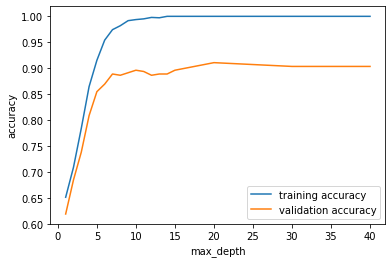

0.9944521497919556
0.8932038834951457


In [11]:
from sklearn.ensemble import RandomForestClassifier
training_accuracy = []
validation_accuracy = []
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40]

for n in depth:
    forest = RandomForestClassifier(n_estimators = 100, max_depth = n, 
                                       random_state = 0, n_jobs = -1)
    forest.fit(X_train,y_train)
    training_accuracy.append(forest.score(X_train,y_train))
    validation_accuracy.append(forest.score(X_valid,y_valid))

plt.plot(depth,training_accuracy,label='training accuracy')
plt.plot(depth,validation_accuracy,label='validation accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.legend()
plt.show()
print(training_accuracy[10])
print(validation_accuracy[10])

In [12]:
random_forest = RandomForestClassifier(n_estimators = 100,  max_depth = 10,random_state = 2, n_jobs = -1)
random_forest.fit(X_train,y_train)
print(f'train set accuracy: {random_forest.score(X_train,y_train)}')
print(f'test set accuracy: {random_forest.score(X_test, y_test)}')

train set accuracy: 0.9937586685159501
test set accuracy: 0.9029126213592233


In [13]:
from sklearn.model_selection import KFold
KFold = KFold(n_splits = 10, shuffle=True, random_state=66)
new_cvs2 = cross_val_score(random_forest,X_valid,y_valid,cv = KFold)
print(f'Cross validation score: {new_cvs2}')
print(f'Average cross validation score: {new_cvs2.mean()}')

Cross validation score: [0.95238095 0.95238095 0.95121951 0.90243902 0.92682927 0.87804878
 0.87804878 0.87804878 0.80487805 0.87804878]
Average cross validation score: 0.9002322880371662


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 123)

new_forest = RandomForestClassifier(n_estimators = 100,  max_depth = 10,random_state = 2, n_jobs = -1)
new_forest.fit(X_train,y_train)
print(f'train set accuracy: {new_forest.score(X_train,y_train)}')
print(f'test set accuracy: {new_forest.score(X_test,y_test)}')

train set accuracy: 0.9948220064724919
test set accuracy: 0.912621359223301


In [15]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
y_pred = new_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[165  22   1]
 [  4 238   1]
 [  3  14  67]]


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       188
           1       0.87      0.98      0.92       243
           2       0.97      0.80      0.88        84

    accuracy                           0.91       515
   macro avg       0.93      0.88      0.90       515
weighted avg       0.92      0.91      0.91       515



In [17]:
final_forest = RandomForestClassifier(n_estimators = 100, max_depth = 10, n_jobs = -1,random_state = 74)
final_forest.fit(X,y)
print(final_forest.score(X,y))

0.9917475728155339


In [18]:
final_forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=868452254, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1806447451, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                        max_features='auto', max_leaf_nodes=None,
                        

In [19]:
print(len(final_forest.estimators_))

100


In [20]:
final_forest.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=868452254, splitter='best')

In [21]:
feature = df.columns[0:2048]
print(feature)
target = df.columns[2048]
print(target)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_2038', 'feature_2039', 'feature_2040', 'feature_2041',
       'feature_2042', 'feature_2043', 'feature_2044', 'feature_2045',
       'feature_2046', 'feature_2047'],
      dtype='object', length=2048)
label


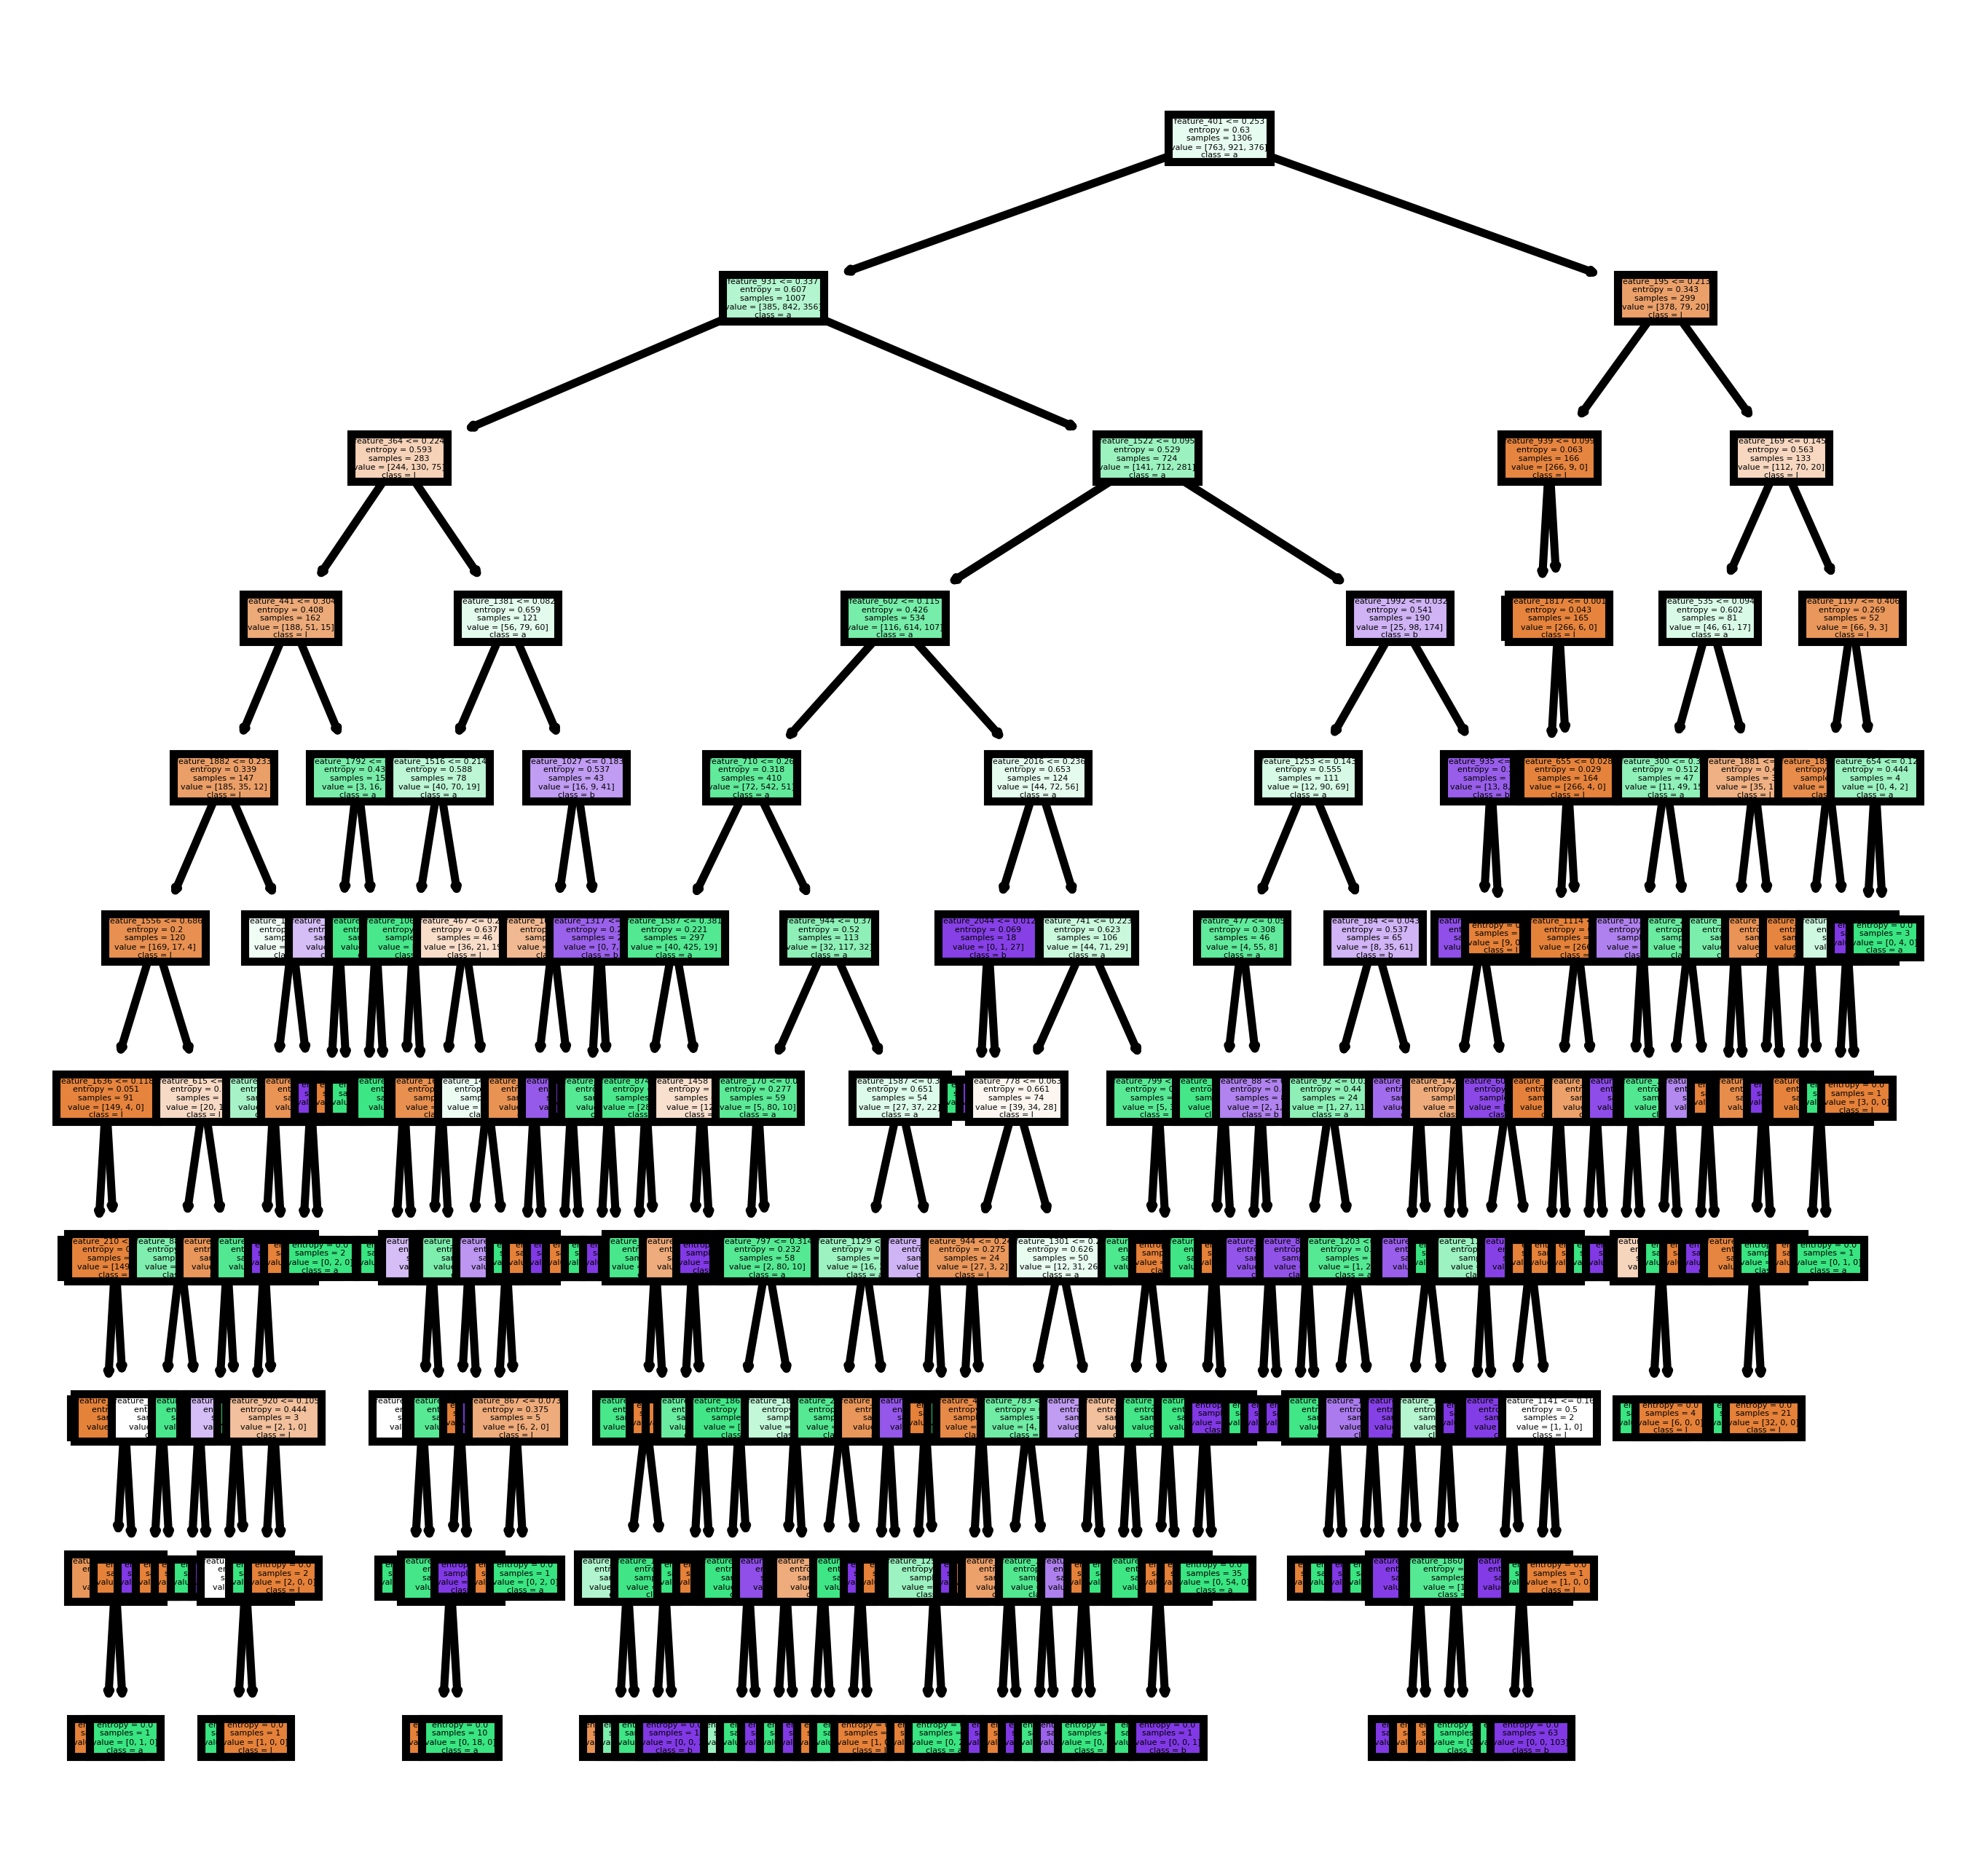

In [22]:
from sklearn.tree import plot_tree
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(final_forest.estimators_[0],
               feature_names = feature, 
               class_names=target,
               filled = True);
fig.savefig('decision_tree.png')

In [23]:
final_forest.estimators_[0].tree_.max_depth

10

In [24]:
from dtreeviz import *

In [25]:
from dtreeviz.trees import dtreeviz

In [26]:
viz = dtreeviz(final_forest.estimators_[0], 
               X, 
               y,
               feature_names=feature, 
               class_names=[0,1,2] 
              )  
              
viz